<a href="https://colab.research.google.com/github/syauqidamario/dqlab/blob/main/COVID_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
pd.set_option("display.max_columns", None)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

covid_url = "https://storage.googleapis.com/dqlab-dataset/covid19_worldwide_2020.json"
df_covid_worldwide = pd.read_json(covid_url)

print("Ukuran dataset: %d kolom dan %d baris.\n" % df_covid_worldwide.shape)
print("Lima data teratas:\n", df_covid_worldwide.head())
print("\nLima data terbawah:\n", df_covid_worldwide.tail())

Ukuran dataset: 61900 kolom dan 6 baris.

Lima data teratas:
         date  daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
0 2020-03-20                      1             0                1       0   
1 2020-03-21                      0             0                1       0   
2 2020-03-22                      1             0                2       0   
3 2020-03-23                      0             0                2       0   
4 2020-03-24                      0             0                2       0   

  geo_id  
0     TD  
1     TD  
2     TD  
3     TD  
4     TD  

Lima data terbawah:
             date  daily_confirmed_cases  daily_deaths  confirmed_cases  \
61895 2020-02-24                     57             1              691   
61896 2020-02-26                      0             1              691   
61897 2020-03-10                     -9             1              696   
61898 2020-02-20                     79             2              621   
61899 2020-

In [5]:
print("Informasi data frame awal:")
df_covid_worldwide.info()

# Set kolom date sebagai index dan urutkan berdasarkan index
df_covid_worldwide = df_covid_worldwide.set_index("date").sort_index()

print("\nInformasi data frame setelah set index kolom date:")
df_covid_worldwide.info()

Informasi data frame awal:
<class 'pandas.core.frame.DataFrame'>
Index: 61900 entries, 0 to 61899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   61900 non-null  datetime64[ns]
 1   daily_confirmed_cases  61900 non-null  int64         
 2   daily_deaths           61900 non-null  int64         
 3   confirmed_cases        61900 non-null  int64         
 4   deaths                 61900 non-null  int64         
 5   geo_id                 61625 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.3+ MB

Informasi data frame setelah set index kolom date:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61900 entries, 2019-12-31 to 2020-12-14
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   daily_confirmed_cases  61900 non-null  int64 

In [8]:
# Menghapus baris data tanpa nilai
print("Jumlah missing value tiap kolom:")
print(df_covid_worldwide.isna().sum())

df_covid_worldwide.dropna(inplace=True)

print("\nJumlah missing value tiap kolom setelah didrop:")
print(df_covid_worldwide.isna().sum())

Jumlah missing value tiap kolom:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64

Jumlah missing value tiap kolom setelah didrop:
daily_confirmed_cases    0
daily_deaths             0
confirmed_cases          0
deaths                   0
geo_id                   0
dtype: int64


In [9]:
# Membaca data countries
countries_url = "https://storage.googleapis.com/dqlab-dataset/country_details.json"
df_countries = pd.read_json(countries_url)
print(df_countries.head())

  geo_id country_name
0     TD         Chad
1     CU         Cuba
2     FJ         Fiji
3     GU         Guam
4     IR         Iran


In [11]:
# Merge Covid19 Data dan Countries
df_covid_denormalized = pd.merge(df_covid_worldwide.reset_index(), df_countries, on="geo_id").set_index("date")

print(df_covid_denormalized.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                     27             0               27       0   

           geo_id country_name  
date                            
2019-12-31     IN        India  
2019-12-31     IR         Iran  
2019-12-31     PK     Pakistan  
2019-12-31     AM      Armenia  
2019-12-31     CN        China  


In [17]:
# Menghitung fatality ratio
df_covid_denormalized["fatality_ratio"] = df_covid_denormalized["deaths"]/df_covid_denormalized["confirmed_cases"].replace(0, np.nan)
print(df_covid_denormalized.head())

            daily_confirmed_cases  daily_deaths  confirmed_cases  deaths  \
date                                                                       
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                      0             0                0       0   
2019-12-31                     27             0               27       0   

           geo_id country_name  fatality_ratio  
date                                            
2019-12-31     IN        India             NaN  
2019-12-31     IR         Iran             NaN  
2019-12-31     PK     Pakistan             NaN  
2019-12-31     AM      Armenia             NaN  
2019-12-31     CN        China             0.0  


In [18]:
# Fatality ratio tertinggi
df_top_20_fatality_rate = df_covid_denormalized.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-03-15     SD        Sudan             1.0
2020-03-16     GT    Guatemala             1.0
2020-03-18     SD        Sudan             1.0
2020-03-13     GY       Guyana             1.0
2020-02-20     IR         Iran             1.0
2020-03-17     SD        Sudan             1.0
2020-03-16     SD        Sudan             1.0
2020-03-19     SD        Sudan             0.5
2020-03-22     SD        Sudan             0.5
2020-03-24     SD        Sudan             0.5
2020-03-24     GM       Gambia             0.5
2020-03-23     SD        Sudan             0.5
2020-03-25     ZW     Zimbabwe             0.5
2020-03-24     ZW     Zimbabwe             0.5
2020-03-20     SD        Sudan             0.5
2020-03-21     SD        Sudan             0.5
2020-03-28     NI    Nicaragua             0.5
2020-02-02     PH  Philippines             0.5
2020-02-03     PH  Philippines             0.5
2020-02-05   

In [19]:
# Fatality ratio tertinggi bulan Agustus 2020
df_covid_denormalized["month"] = df_covid_denormalized.index.month
df_covid_denormalized["year"] = df_covid_denormalized.index.year
df_august_2020 = df_covid_denormalized[(df_covid_denormalized["month"] == 8) & (df_covid_denormalized["year"] == 2020)]
df_top_20_fatality_rate_august = df_august_2020.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate_august[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-08-28     YE        Yemen        0.290589
2020-08-27     YE        Yemen        0.290155
2020-08-29     YE        Yemen        0.289758
2020-08-30     YE        Yemen        0.289676
2020-08-25     YE        Yemen        0.289666
2020-08-26     YE        Yemen        0.289501
2020-08-31     YE        Yemen        0.288786
2020-08-07     YE        Yemen        0.288059
2020-08-06     YE        Yemen        0.287982
2020-08-05     YE        Yemen        0.287500
2020-08-04     YE        Yemen        0.287112
2020-08-13     YE        Yemen        0.286801
2020-08-03     YE        Yemen        0.286621
2020-08-23     YE        Yemen        0.286314
2020-08-24     YE        Yemen        0.286238
2020-08-14     YE        Yemen        0.285869
2020-08-12     YE        Yemen        0.285636
2020-08-02     YE        Yemen        0.285549
2020-08-10     YE        Yemen        0.285477
2020-08-01   

In [20]:
# Fatality ratio tertinggi bulan Desember 2020
df_covid_denormalized["month"] = df_covid_denormalized.index.month
df_covid_denormalized["year"] = df_covid_denormalized.index.year
df_august_2020 = df_covid_denormalized[(df_covid_denormalized["month"] == 12) & (df_covid_denormalized["year"] == 2020)]
df_top_20_fatality_rate_august = df_august_2020.sort_values("fatality_ratio", ascending=False).head(20)
print(df_top_20_fatality_rate_august[["geo_id","country_name","fatality_ratio"]])

           geo_id country_name  fatality_ratio
date                                          
2020-12-06     YE        Yemen        0.291767
2020-12-05     YE        Yemen        0.291767
2020-12-04     YE        Yemen        0.291767
2020-12-07     YE        Yemen        0.291767
2020-12-08     YE        Yemen        0.291627
2020-12-09     YE        Yemen        0.291486
2020-12-10     YE        Yemen        0.291486
2020-12-03     YE        Yemen        0.291286
2020-12-02     YE        Yemen        0.291286
2020-12-01     YE        Yemen        0.291286
2020-12-11     YE        Yemen        0.291206
2020-12-12     YE        Yemen        0.291066
2020-12-13     YE        Yemen        0.290927
2020-12-14     YE        Yemen        0.290927
2020-12-01     MX       Mexico        0.095138
2020-12-02     MX       Mexico        0.095125
2020-12-03     MX       Mexico        0.094887
2020-12-04     MX       Mexico        0.094504
2020-12-05     MX       Mexico        0.094109
2020-12-09   

In [24]:
# Visualisasi Negara dengan Fatality Ratio Tertinggi di Bulan Agustus 2020

import plotly.express as px

fig = px.bar(df_top_20_fatality_rate_august, x="country_name", y="fatality_ratio", color="country_name", title="Fatality Ratio Tertinggi di Bulan Agustus 2020")
fig.show()

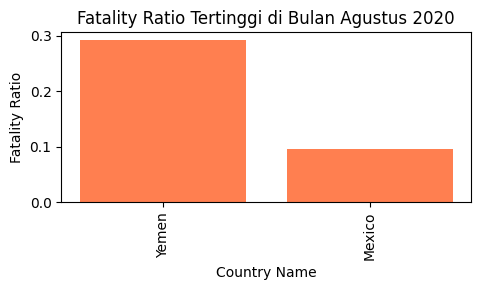

In [28]:
# prompt: Menggunakan data di atas, buatlah bar chart untuk Fatality Ratio Agustus 2020 menggunakan matplotlib dengan coral

import matplotlib.pyplot as plt

# Assuming df_top_20_fatality_rate_august is already defined from the previous code

plt.figure(figsize=(5, 3))
plt.bar(df_top_20_fatality_rate_august["country_name"], df_top_20_fatality_rate_august["fatality_ratio"], color='coral')
plt.xlabel("Country Name")
plt.ylabel("Fatality Ratio")
plt.title("Fatality Ratio Tertinggi di Bulan Agustus 2020")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()